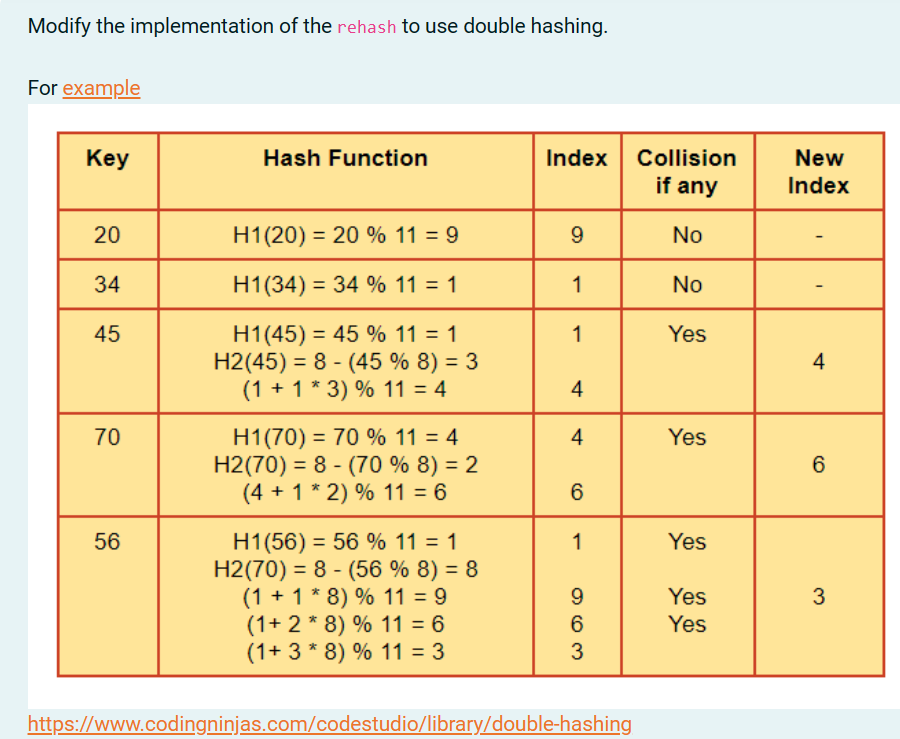
https://www.codingninjas.com/codestudio/library/double-hashing

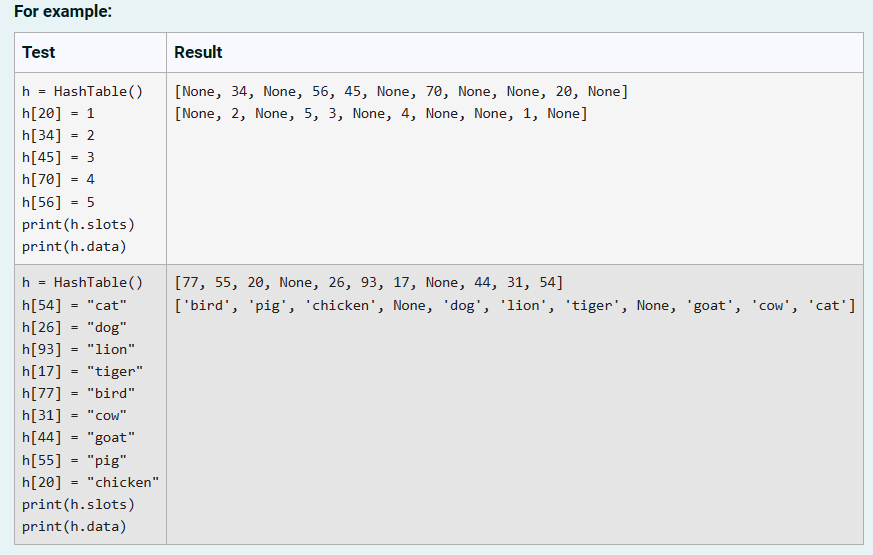

In [19]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self, key, data):
        hash_value = self.hash_function(key, len(self.slots))

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data  # replace
            else:
                fc = hash_value                            # the first index that gets collision
                hash_value = self.HashFunction2(key)       # convert key to hash function 2
                n = 1                                      # start count at 1
                next_slot = self.rehash(hash_value, len(self.slots), fc, n)
                while (
                    self.slots[next_slot] is not None
                    and self.slots[next_slot] != key
                ):
                    n += 1
                    next_slot = self.rehash(hash_value, len(self.slots), fc, n)

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def hash_function(self, key, size):
        return key % size
    
    def HashFunction2(self, key, prime=8):
        return prime - (key % prime)                            # hash function 2 from the example

    def rehash(self, old_hash, size, FirstCollision, count):
        return (FirstCollision + count*old_hash) % size         # rehash equation from the example

    def get(self, key):
        start_slot = self.hash_function(key, len(self.slots))

        position = start_slot
        while self.slots[position] is not None:
            if self.slots[position] == key:
                return self.data[position]
            else:
                position = self.rehash(position, len(self.slots))
                if position == start_slot:
                    return None

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, data):
        self.put(key, data)

# Case Example #

In [20]:
h = HashTable()
h[20] = 1
h[34] = 2
h[45] = 3
h[70] = 4
h[56] = 5
print(h.slots)
print(h.data)

[None, 34, None, 56, 45, None, 70, None, None, 20, None]
[None, 2, None, 5, 3, None, 4, None, None, 1, None]


In [21]:
h = HashTable()
h[54] = "cat"
h[26] = "dog"
h[93] = "lion"
h[17] = "tiger"
h[77] = "bird"
h[31] = "cow"
h[44] = "goat"
h[55] = "pig"
h[20] = "chicken"
print(h.slots)
print(h.data)

[77, 55, 20, None, 26, 93, 17, None, 44, 31, 54]
['bird', 'pig', 'chicken', None, 'dog', 'lion', 'tiger', None, 'goat', 'cow', 'cat']
